In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import os
import sys
import pip

pd.set_option('display.max_columns', None) # replace None with a number
pd.set_option('display.max_rows', None) # replace None with a number

!/usr/local/bin/python3 -m pip install openpyxl


In [ ]:
#import excel files
tomb = pd.read_excel('project.xlsx', sheet_name='main')
county = pd.read_excel('project.xlsx', sheet_name='county')
period = pd.read_excel('project.xlsx', sheet_name='period')

#tomb.head(None)
county.head(None)
#period.head(None)


,county,county_ft,latitude,longitude
0,dengxian,鄧縣,32.054500,112.098400
1,fangling,房陵,32.055568,110.736777
2,luozhou,羅州,30.260882,115.441529
3,xiangyang,襄陽,32.012435,112.140119
4,jinancheng,紀南城,30.425110,112.163394
5,zhijiang,枝江,30.501700,111.901800
6,shaxian,沙羨,30.334000,114.122300
7,zanxian,贊縣,32.390400,111.612400
8,chongling,舂陵,31.987549,112.833342
9,gucheng,穀城,32.222700,111.587300


In [ ]:
#merge: tomb + county
tomb_county=tomb.merge(county,left_on="county", right_on="county", how="left")
#tomb_county.head(None)

tomb_county_period=tomb_county.merge(period,left_on="period", right_on="period", how="left")    

#make it into one dataframe
project=tomb_county_period
project.head(5)

,tomb_id,latitude_x,longitude_x,quantity,period,region,county,county_ft,latitude_y,longitude_y,period_ft,start_date,end_date
0,1,32.078210,112.107788,6.0,Western Han,hubei,dengxian,鄧縣,32.054500,112.098400,前漢,-202,9
1,2,32.078210,112.107788,8.0,Eastern Han,hubei,dengxian,鄧縣,32.054500,112.098400,後漢,25,220
2,3,32.071566,110.743744,19.0,Western Han,hubei,fangling,房陵,32.055568,110.736777,前漢,-202,9
3,4,32.071566,110.743744,11.0,Eastern Han,hubei,fangling,房陵,32.055568,110.736777,後漢,25,220
4,5,30.241281,115.446420,24.0,Western Han,hubei,luozhou,羅州,30.260882,115.441529,前漢,-202,9


In [ ]:
#make it into a csv file
project.to_csv('project.csv')


In [ ]:
#sort the county, county_ft, latitude_y, longitude_y column out and make it into a csv file 
county_df = project[['county', 'county_ft', 'latitude_y', 'longitude_y']].drop_duplicates().sort_values(by=['county', 'county_ft', 'latitude_y', 'longitude_y'])
#project.to_csv('county.csv')
county_df.to_csv('county.csv', index=False)



In [ ]:
#pip install haversine
!/usr/local/bin/python3 -m pip install haversine
from haversine import haversine, Unit   


In [ ]:
#Measure the distance between two points
loc_tomb=project[['tomb_id','latitude_x','longitude_x']]
loc_county=project[['tomb_id','latitude_y','longitude_y']]
 
distance = []

for i in range(len(loc_tomb)):
    tomb = (loc_tomb.iloc[i,1], loc_tomb.iloc[i,2])
    county = (loc_county.iloc[i,1], loc_county.iloc[i,2])
    distance.append(haversine(tomb, county, unit='km'))
    
project['distance'] = distance
project['distance'] = project['distance'].round(2)

project.to_csv('project_all.csv', index=False)

#distance_list= project.sort_values(by='distance', ascending=True)
#distance_list.head(5)


In [ ]:
project.head()

,tomb_id,latitude_x,longitude_x,quantity,period,region,county,county_ft,latitude_y,longitude_y,period_ft,start_date,end_date,distance
0,1,32.078210,112.107788,6.0,Western Han,hubei,dengxian,鄧縣,32.054500,112.098400,前漢,-202,9,2.78
1,2,32.078210,112.107788,8.0,Eastern Han,hubei,dengxian,鄧縣,32.054500,112.098400,後漢,25,220,2.78
2,3,32.071566,110.743744,19.0,Western Han,hubei,fangling,房陵,32.055568,110.736777,前漢,-202,9,1.90
3,4,32.071566,110.743744,11.0,Eastern Han,hubei,fangling,房陵,32.055568,110.736777,後漢,25,220,1.90
4,5,30.241281,115.446420,24.0,Western Han,hubei,luozhou,羅州,30.260882,115.441529,前漢,-202,9,2.23


In [ ]:
project['period'].unique()

array(['Western Han', 'Eastern Han', 'Xin'], dtype=object)

In [ ]:
project.sort_values('county')

,tomb_id,latitude_x,longitude_x,quantity,period,region,county,county_ft,latitude_y,longitude_y,period_ft,start_date,end_date,distance
25,26,31.020180,113.741018,1.0,Western Han,hubei,anlu,安陸,31.021954,113.754142,前漢,-202,9,1.27
61,62,31.341482,114.044296,2.0,Eastern Han,hubei,anlu,安陸,31.021954,113.754142,後漢,25,220,44.99
40,41,31.023808,113.731913,4.0,Western Han,hubei,anlu,安陸,31.021954,113.754142,前漢,-202,9,2.13
57,58,31.042988,113.807671,1.0,Eastern Han,hubei,anlu,安陸,31.021954,113.754142,後漢,25,220,5.61
52,53,31.013973,113.769471,1.0,Western Han,hubei,anlu,安陸,31.021954,113.754142,前漢,-202,9,1.71
160,161,32.723058,113.315492,1.0,Eastern Han,henan,biyang,沘陽,32.715100,113.308900,後漢,25,220,1.08
159,160,32.723058,113.315492,1.0,Eastern Han,henan,biyang,沘陽,32.715100,113.308900,後漢,25,220,1.08
155,156,32.723058,113.315492,1.0,Eastern Han,henan,biyang,沘陽,32.715100,113.308900,後漢,25,220,1.08
156,157,32.723058,113.315492,1.0,Eastern Han,henan,biyang,沘陽,32.715100,113.308900,後漢,25,220,1.08
157,158,32.723058,113.315492,8.0,Eastern Han,henan,biyang,沘陽,32.715100,113.308900,後漢,25,220,1.08


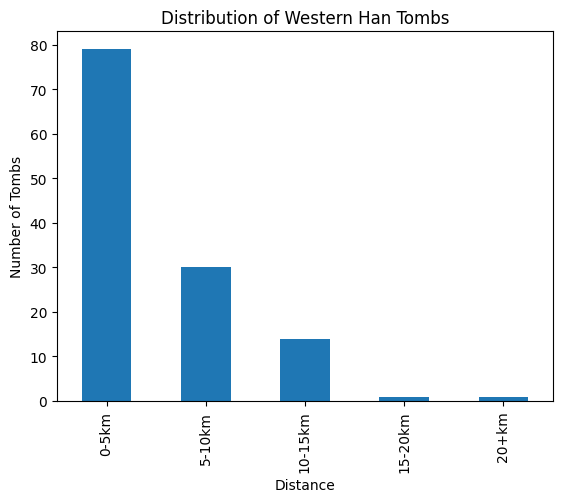

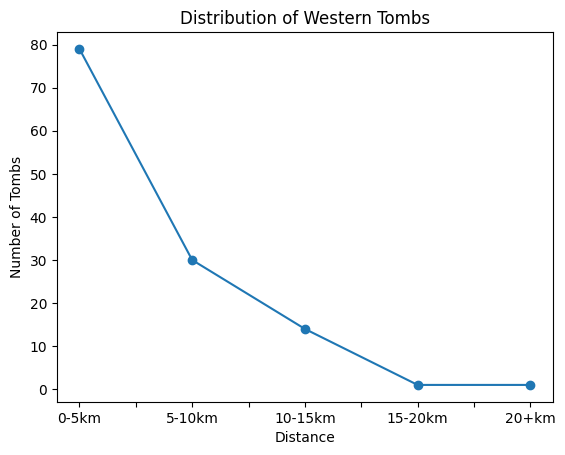

In [ ]:
#distance distribution in western tombs
#BAR GRAPHS
western_tombs = project.query('period == "Western Han"')[['tomb_id', 'distance']]
bins = [0, 5, 10, 15, 20, float('inf')]
western_tombs['distance_category'] = pd.cut(western_tombs['distance'], bins=bins, labels=['0-5km', '5-10km', '10-15km', '15-20km', '20+km'], right=False)
# Group by 'distance_category' and count the occurrences
category_counts = western_tombs['distance_category'].value_counts().sort_index()

# Plot the bar chart
category_counts.plot.bar()
plt.xlabel('Distance')
plt.ylabel('Number of Tombs')
plt.title('Distribution of Western Han Tombs')
plt.show()

#LINE GRAPHS

western_tombs = project.query('period == "Western Han"')[['tomb_id', 'distance']]

# Define the bins for distance categories
bins = [0, 5, 10, 15, 20, float('inf')]

# Create a new column 'distance_category' based on the bins
western_tombs['distance_category'] = pd.cut(western_tombs['distance'], bins=bins, labels=['0-5km', '5-10km', '10-15km', '15-20km', '20+km'], right=False)

# Group by 'distance_category' and count the occurrences
category_counts = western_tombs['distance_category'].value_counts().sort_index()

# Plot the line graph
category_counts.plot.line(marker='o')
plt.xlabel('Distance')
plt.ylabel('Number of Tombs')
plt.title('Distribution of Western Tombs')
plt.show()

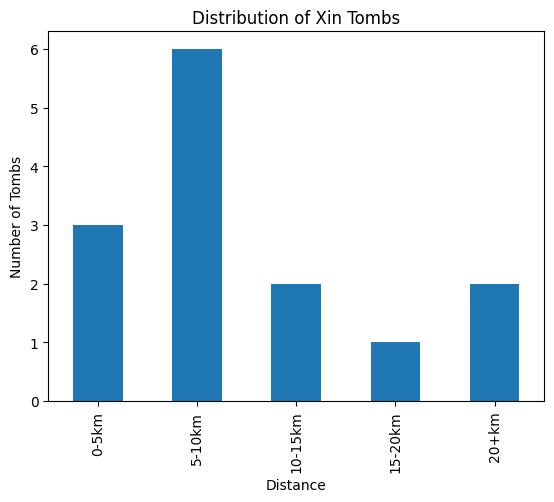

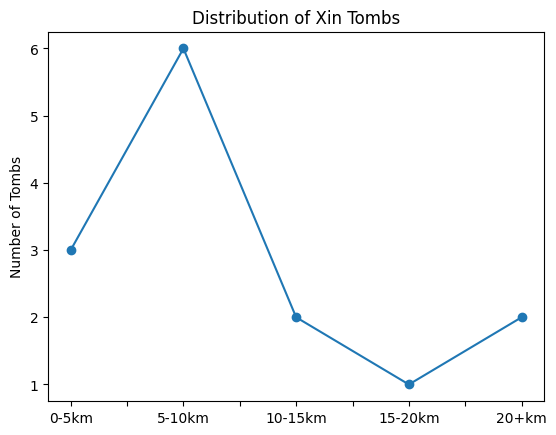

In [ ]:
#BAR GRAPHS
xin_tombs = project.query('period == "Xin"')[['tomb_id', 'distance']]
bins = [0, 5, 10, 15, 20, float('inf')]
xin_tombs['distance_category'] = pd.cut(xin_tombs['distance'], bins=bins, labels=['0-5km', '5-10km', '10-15km', '15-20km', '20+km'], right=False)
# Group by 'distance_category' and count the occurrences
category_counts = xin_tombs['distance_category'].value_counts().sort_index()

# Plot the bar chart
category_counts.plot.bar()
plt.xlabel('Distance')
plt.ylabel('Number of Tombs')
plt.title('Distribution of Xin Tombs')
plt.show()


#LINE GRAPHS

xin_tombs = project.query('period == "Xin"')[['tomb_id', 'distance']]

# Define the bins for distance categories
bins = [0, 5, 10, 15, 20, float('inf')]

# Create a new column 'distance_category' based on the bins
xin_tombs['distance_category'] = pd.cut(xin_tombs['distance'], bins=bins, labels=['0-5km', '5-10km', '10-15km', '15-20km', '20+km'], right=False)

# Group by 'distance_category' and count the occurrences
category_counts = xin_tombs['distance_category'].value_counts().sort_index()

# Plot the line graph without showing the x-axis labels
category_counts.plot.line(marker='o')
plt.xlabel('')  # Empty string to remove x-axis label
plt.ylabel('Number of Tombs')
plt.title('Distribution of Xin Tombs')
plt.show()

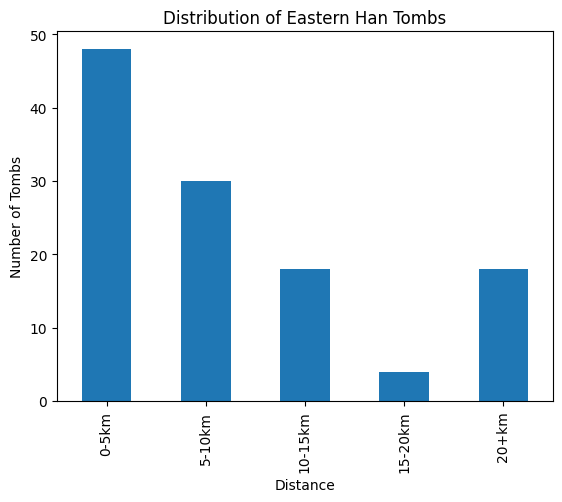

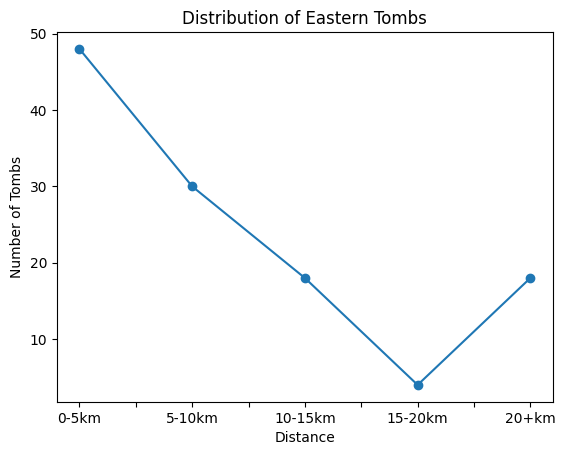

In [ ]:
#BAR GRAPHS
eastern_tombs = project.query('period == "Eastern Han"')[['tomb_id', 'distance']]
bins = [0, 5, 10, 15, 20, float('inf')]
eastern_tombs['distance_category'] = pd.cut(eastern_tombs['distance'], bins=bins, labels=['0-5km', '5-10km', '10-15km', '15-20km', '20+km'], right=False)

category_counts = eastern_tombs['distance_category'].value_counts().sort_index()

# Plot the bar chart
category_counts.plot.bar()
plt.xlabel('Distance')
plt.ylabel('Number of Tombs')
plt.title('Distribution of Eastern Han Tombs')
plt.show()

#LINE GRAPHS

eastern_tombs = project.query('period == "Eastern Han"')[['tomb_id', 'distance']]

# Define the bins for distance categories
bins = [0, 5, 10, 15, 20, float('inf')]

# Create a new column 'distance_category' based on the bins
eastern_tombs['distance_category'] = pd.cut(eastern_tombs['distance'], bins=bins, labels=['0-5km', '5-10km', '10-15km', '15-20km', '20+km'], right=False)

# Group by 'distance_category' and count the occurrences
category_counts = eastern_tombs['distance_category'].value_counts().sort_index()

# Plot the line graph
category_counts.plot.line(marker='o')
plt.xlabel('Distance')
plt.ylabel('Number of Tombs')
plt.title('Distribution of Eastern Tombs')
plt.show()

/var/folders/wh/v7kc6jwn31l43wfkf9w5d7n80000gn/T/ipykernel_43350/2331101349.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/wh/v7kc6jwn31l43wfkf9w5d7n80000gn/T/ipykernel_43350/2331101349.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/wh/v7kc6jwn31l43wfkf9w5d7n80000gn/T/ipykernel_43350/2331101349.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



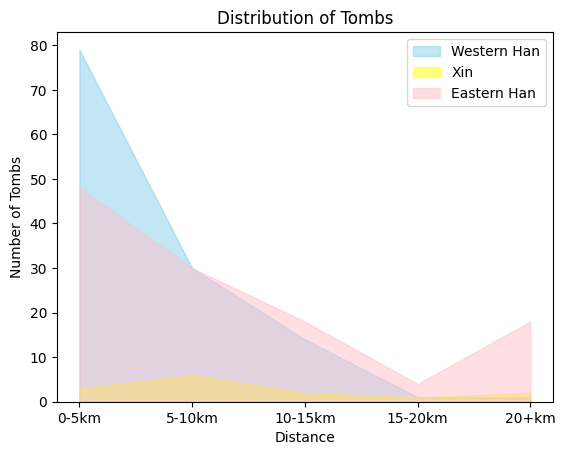

In [ ]:
# Assuming 'project' is your DataFrame, and 'distance' and 'period' are columns in your DataFrame
# Replace 'project' with your actual DataFrame name

bins = [0, 5, 10, 15, 20, float('inf')]

# Function to create stacked line graph for a given period
def plot_distance_distribution(period, color):
    # Filter rows for the given period, select columns 'tomb_id' and 'distance'
    period_tombs = project.query(f'period == "{period}"')[['tomb_id', 'distance']]

    # Create a new column 'distance_category' based on the bins
    period_tombs['distance_category'] = pd.cut(period_tombs['distance'], bins=bins, labels=['0-5km', '5-10km', '10-15km', '15-20km', '20+km'], right=False)

    # Group by 'distance_category' and count the occurrences
    category_counts = period_tombs.groupby('distance_category').size().reindex(['0-5km', '5-10km', '10-15km', '15-20km', '20+km']).fillna(0)

    # Plot the stacked line graph using stackplot with specified color
    plt.stackplot(category_counts.index, category_counts.values, labels=[f'{period}'], alpha=0.5, color=color)

# Plot line graph for each period, specifying colors
plot_distance_distribution('Western Han', 'skyblue')
plot_distance_distribution('Xin', 'yellow')
plot_distance_distribution('Eastern Han', 'pink')

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Number of Tombs')
plt.title('Distribution of Tombs')
plt.legend()  # Show legend to differentiate between periods
plt.show()